In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

tot_df = pd.read_csv(
    "../data/raw/total_CS/pp_total_sigma.csv"
)

# Keep only needed columns
tot_df = tot_df[
    ["E_MeV", "sigma_tot_mb", "delta_sigma_tot_mb"]
]

tot_df


,E_MeV,sigma_tot_mb,delta_sigma_tot_mb
0,315.0,24.299,1.00
1,325.0,24.463,0.40
2,342.5,24.778,0.23
3,388.0,25.824,0.23
4,406.5,26.374,0.23
5,408.0,26.423,1.50
6,410.0,26.488,1.40
7,410.0,26.488,0.70
8,433.0,27.327,0.40
9,439.5,27.594,0.29


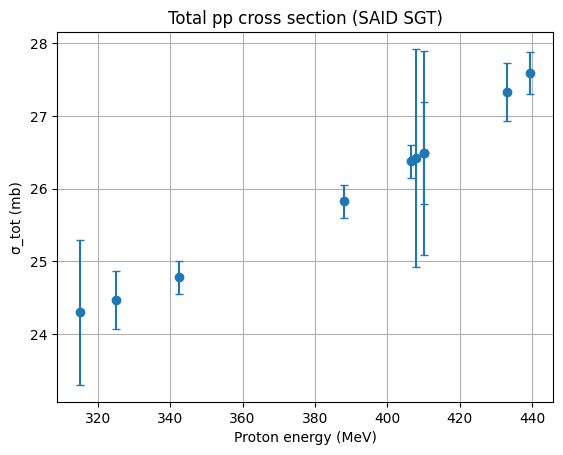

,E_MeV,sigma_el_mb,delta_sigma_el_mb
0,300.0,40.030667,4.003067
1,345.0,29.535416,0.569772


In [25]:
plt.errorbar(
    tot_df["E_MeV"],
    tot_df["sigma_tot_mb"],
    yerr=tot_df["delta_sigma_tot_mb"],
    fmt="o",
    capsize=3,
)

plt.xlabel("Proton energy (MeV)")
plt.ylabel("σ_tot (mb)")
plt.title("Total pp cross section (SAID SGT)")
plt.grid(True)
plt.show()

elastic_df = pd.read_csv(
    "../data/processed/elastic_sigma.csv"
)

elastic_df

In [26]:
elastic_df["sigma_tot_mb"] = np.interp(
    elastic_df["E_MeV"],
    tot_df["E_MeV"],
    tot_df["sigma_tot_mb"],
)

elastic_df["delta_sigma_tot_mb"] = np.interp(
    elastic_df["E_MeV"],
    tot_df["E_MeV"],
    tot_df["delta_sigma_tot_mb"],
)

elastic_df

,E_MeV,sigma_el_mb,delta_sigma_el_mb,sigma_tot_mb,delta_sigma_tot_mb
0,300.0,40.030667,4.003067,24.299000,1.00
1,345.0,29.535416,0.569772,24.835473,0.23


In [27]:
elastic_df = pd.read_csv(
    "../data/processed/elastic_sigma.csv"
)

# Convert integrated elastic strength to physical σ_el for pp
elastic_df["sigma_el_mb"] *= 0.5
elastic_df["delta_sigma_el_mb"] *= 0.5

elastic_df

assert np.all(
    elastic_df["sigma_el_mb"] < elastic_df["sigma_tot_mb"]
), "Elastic exceeds total — check definitions"



KeyError: 'sigma_tot_mb'

In [ ]:
elastic_df.columns


In [ ]:
elastic_df["sigma_tot_mb"] = np.interp(
    elastic_df["E_MeV"],
    tot_df["E_MeV"],
    tot_df["sigma_tot_mb"],
)

elastic_df["delta_sigma_tot_mb"] = np.interp(
    elastic_df["E_MeV"],
    tot_df["E_MeV"],
    tot_df["delta_sigma_tot_mb"],
)

elastic_df["sigma_inel_mb"] = (
    elastic_df["sigma_tot_mb"] - elastic_df["sigma_el_mb"]
)

elastic_df["delta_sigma_inel_mb"] = np.sqrt(
    elastic_df["delta_sigma_tot_mb"]**2 +
    elastic_df["delta_sigma_el_mb"]**2
)

elastic_df


In [ ]:
elastic_df[
    ["E_MeV", "sigma_tot_mb", "delta_sigma_tot_mb"]
].to_csv(
    "../data/processed/total_sigma.csv",
    index=False,
)

elastic_df[
    ["E_MeV", "sigma_inel_mb", "delta_sigma_inel_mb"]
].to_csv(
    "../data/processed/inelastic_sigma.csv",
    index=False,
)